In [179]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from warnings import filterwarnings
filterwarnings('ignore')

In [181]:
spine = pd.read_csv("Dataset_spine.csv")
df = spine.copy()
df = df.drop(df.columns[13], axis=1)
df = df.dropna()
df.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Col1       310 non-null    float64
 1   Col2       310 non-null    float64
 2   Col3       310 non-null    float64
 3   Col4       310 non-null    float64
 4   Col5       310 non-null    float64
 5   Col6       310 non-null    float64
 6   Col7       310 non-null    float64
 7   Col8       310 non-null    float64
 8   Col9       310 non-null    float64
 9   Col10      310 non-null    float64
 10  Col11      310 non-null    float64
 11  Col12      310 non-null    float64
 12  Class_att  310 non-null    object 
dtypes: float64(12), object(1)
memory usage: 31.6+ KB


In [185]:
df["Class_att"].value_counts()

Class_att
Abnormal    210
Normal      100
Name: count, dtype: int64

<Axes: ylabel='Class_att'>

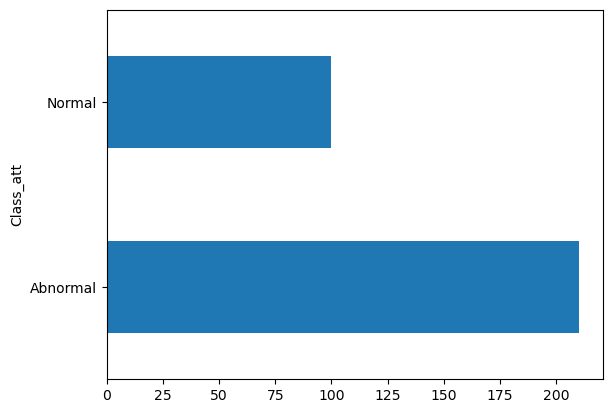

In [187]:
df["Class_att"].value_counts().plot.barh()

In [188]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Col1,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
Col2,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
Col3,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
Col4,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
Col5,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
Col6,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082
Col7,310.0,0.472979,0.285787,0.003220,0.224367,0.475989,0.704846,0.998827
Col8,310.0,21.321526,8.639423,7.027000,13.054400,21.907150,28.954075,36.743900
Col9,310.0,13.064511,3.399713,7.037800,10.417800,12.938450,15.889525,19.324000
Col10,310.0,11.933317,2.893265,7.030600,9.541140,11.953835,14.371810,16.821080


# Model ve Tahmin

In [192]:
y = df["Class_att"]
X = df.drop(["Class_att"], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [194]:
from sklearn.preprocessing import StandardScaler

In [196]:
scaler = StandardScaler()

In [198]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [200]:
X_test_scaled[0:5]

array([[-0.88138851, -0.29551848, -1.06017735, -0.9216705 ,  1.06779087,
        -0.72728612, -1.2197317 , -0.66634967, -1.4560428 ,  0.11932871,
        -1.00015325,  0.62739691],
       [-1.32859004, -1.25934707, -0.50718669, -0.81665152, -2.76115329,
        -0.6198922 , -0.36534398,  0.61591489, -1.23983822,  1.01416035,
         0.96862953, -0.41401076],
       [-0.741351  , -0.1716922 , -0.73218049, -0.82932176, -0.17959447,
        -0.59477725, -1.23862281,  1.0885518 ,  0.4640033 , -1.04108382,
         1.45099334, -0.85123306],
       [ 0.84791567,  1.5850254 ,  1.59094656, -0.02853792,  2.0229323 ,
         0.77543547, -1.10416493,  1.74506079,  0.68814041, -0.05368166,
        -0.38391287, -0.30661967],
       [-0.32159065,  1.01676393, -0.88432743, -1.12755977,  0.23946926,
        -0.59707928,  1.62421576, -0.71941552,  0.15906451,  1.41941061,
        -0.30417005,  0.22809357]])

In [202]:
mlpc = MLPClassifier().fit(X_train_scaled, y_train)

In [203]:
mlpc.coefs_

[array([[-0.02729116, -0.13822354,  0.21134681, ..., -0.23068826,
          0.13900731,  0.14598475],
        [ 0.23249605, -0.117313  ,  0.10955249, ..., -0.07593211,
         -0.23928639,  0.15546867],
        [-0.13594202, -0.14083301, -0.08465561, ...,  0.04068772,
         -0.12596804,  0.17590738],
        ...,
        [ 0.25421544, -0.10005077, -0.27705911, ...,  0.15844673,
          0.12028114,  0.02351107],
        [ 0.28813246,  0.20956187,  0.21222546, ...,  0.04349087,
         -0.15482073, -0.14040671],
        [-0.12965781,  0.33806847,  0.17826643, ..., -0.12319749,
          0.02654522,  0.12550438]]),
 array([[-0.22406693],
        [ 0.35035068],
        [ 0.05095438],
        [-0.13234148],
        [-0.09689815],
        [ 0.04021011],
        [ 0.34686095],
        [-0.10030155],
        [ 0.09872668],
        [-0.1482008 ],
        [ 0.29908079],
        [-0.08285081],
        [-0.33157813],
        [-0.26267962],
        [ 0.18871243],
        [-0.26338782],
     

In [206]:
dir(mlpc)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_backprop',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_check_solver',
 '_compute_loss_grad',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_estimator_type',
 '_fit',
 '_fit_lbfgs',
 '_fit_stochastic',
 '_forward_pass',
 '_forward_pass_fast',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_init_coef',
 '_initialize',
 '_label_binarizer',
 '_loss_grad_lbfgs',
 '_more_tags',
 '_no

In [208]:
y_pred = mlpc.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.8494623655913979

# Model Tuning

In [211]:
mlpc

MLPClassifier()

In [213]:
?mlpc

Type:        MLPClassifier
String form: MLPClassifier()
File:        c:\programdata\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py
Docstring:  
Multi-layer Perceptron classifier.

This model optimizes the log-loss function using LBFGS or stochastic
gradient descent.

.. versionadded:: 0.18

Parameters
----------
hidden_layer_sizes : array-like of shape(n_layers - 2,), default=(100,)
    The ith element represents the number of neurons in the ith
    hidden layer.

activation : {'identity', 'logistic', 'tanh', 'relu'}, default='relu'
    Activation function for the hidden layer.

    - 'identity', no-op activation, useful to implement linear bottleneck,
      returns f(x) = x

    - 'logistic', the logistic sigmoid function,
      returns f(x) = 1 / (1 + exp(-x)).

    - 'tanh', the hyperbolic tan function,
      returns f(x) = tanh(x).

    - 'relu', the rectified linear unit function,
      returns f(x) = max(0, x)

solver : {'lbfgs', 'sgd', 'adam'}, defa

In [215]:
mlpc_params = {"alpha": [0.1, 0.01, 0.02, 0.005, 0.0001, 0.00001], 
               "hidden_layer_sizes": [(10,10,10), 
                                      (100, 100, 100), 
                                      (100, 100), 
                                      (3, 5), 
                                      (5, 3)], 
               "solver": ["lbfgs", "adam", "sgd"], 
               "activation": ["relu", "logistic", "tanh"]}

In [217]:
mlpc = MLPClassifier()
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params, 
                             cv=10, 
                             n_jobs=-1, 
                             verbose=2)

mlpc_cv_model.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 270 candidates, totalling 2700 fits


GridSearchCV(cv=10, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic', 'tanh'],
                         'alpha': [0.1, 0.01, 0.02, 0.005, 0.0001, 1e-05],
                         'hidden_layer_sizes': [(10, 10, 10), (100, 100, 100),
                                                (100, 100), (3, 5), (5, 3)],
                         'solver': ['lbfgs', 'adam', 'sgd']},
             verbose=2)

In [219]:
print("En iyi parametreler: " + str(mlpc_cv_model.best_params_))

En iyi parametreler: {'activation': 'tanh', 'alpha': 1e-05, 'hidden_layer_sizes': (10, 10, 10), 'solver': 'adam'}


In [221]:
mlpc_tuned = MLPClassifier(activation= "tanh", 
                           alpha= 0.005, 
                           hidden_layer_sizes = (10, 10, 10), 
                           solver="adam")

In [223]:
mlpc_tuned.fit(X_train_scaled, y_train)

MLPClassifier(activation='tanh', alpha=0.005, hidden_layer_sizes=(10, 10, 10))

In [225]:
y_pred = mlpc_tuned.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.8172043010752689